In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


dataset = pd.read_csv('KFT Dataset_modified.csv')

In [2]:
# Dataset Info
dataset.info()

# 공백 제거 및 소문자 변환
dataset.columns = dataset.columns.str.strip().str.lower()
print(dataset.columns)

# Missing Values
missing_values = dataset.isnull().sum()
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Menu                       136 non-null    object
 1   Category                   136 non-null    object
 2   Base Type                  136 non-null    object
 3   Flavor Tags                136 non-null    object
 4   Customizable Sweetness     136 non-null    object
 5   Available Sweetness Level  136 non-null    object
 6   Allergens                  136 non-null    object
 7   Contains Caffeine          136 non-null    object
 8   Contains Gluten            136 non-null    object
 9   Oat Milk Substitution      136 non-null    object
 10  Vegan-friendly             136 non-null    object
 11  Contains dairy             136 non-null    object
dtypes: object(12)
memory usage: 12.9+ KB
Index(['menu', 'category', 'base type', 'flavor tags',
       'customizable sweetne

In [3]:
# Unique Values in Categorical Columns
for col in ['menu', 'category', 'base type', 'flavor tags']:
    print(f"{col}: {dataset[col].nunique()} unique values")

menu: 136 unique values
category: 8 unique values
base type: 18 unique values
flavor tags: 95 unique values


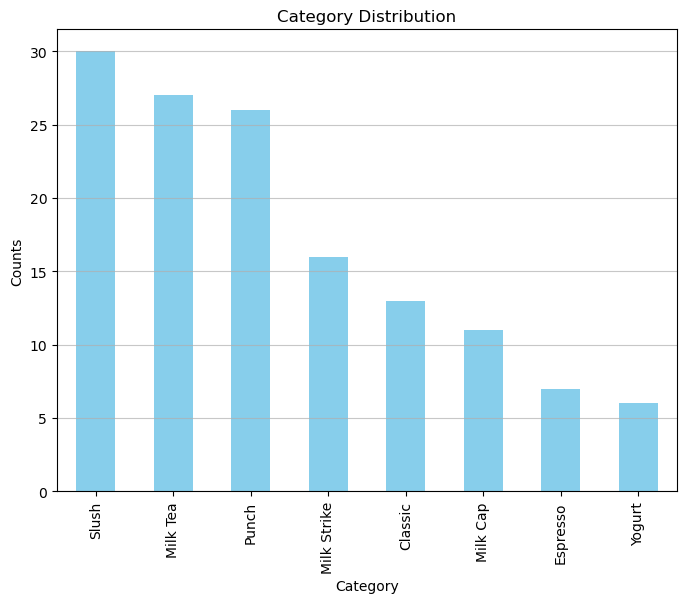

In [4]:
category_counts = dataset['category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.7)
plt.show()

/var/folders/d5/v0w7v20x70z55jvhywdpp06h0000gn/T/ipykernel_24258/65052216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_combi.values, y=top_combi.index, palette='viridis')


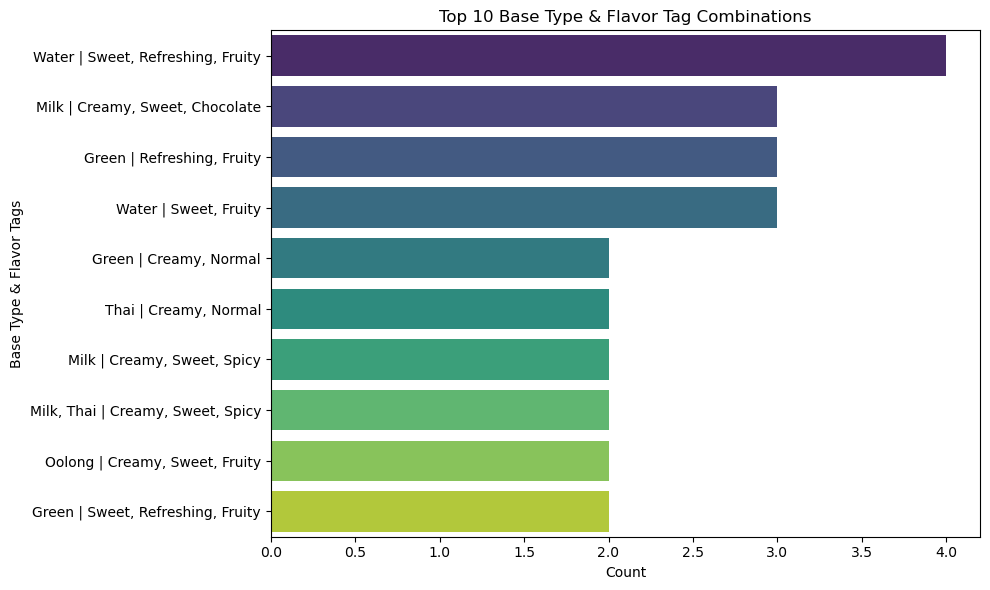

In [5]:
# Base Type & Flavor Tags Paring
base_flavor_combinations = dataset['base type'] + " | " + dataset['flavor tags']
combination_counts = base_flavor_combinations.value_counts()

# -> Top 10 Most Common Combinations
top_combi = combination_counts.head(10)
#print(top_combi)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_combi.values, y=top_combi.index, palette='viridis')
plt.title('Top 10 Base Type & Flavor Tag Combinations')
plt.xlabel('Count')
plt.ylabel('Base Type & Flavor Tags')
plt.tight_layout()
plt.show()

/var/folders/d5/v0w7v20x70z55jvhywdpp06h0000gn/T/ipykernel_24258/4009363738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flavor_df['Count'], y=flavor_df.index, palette='coolwarm')


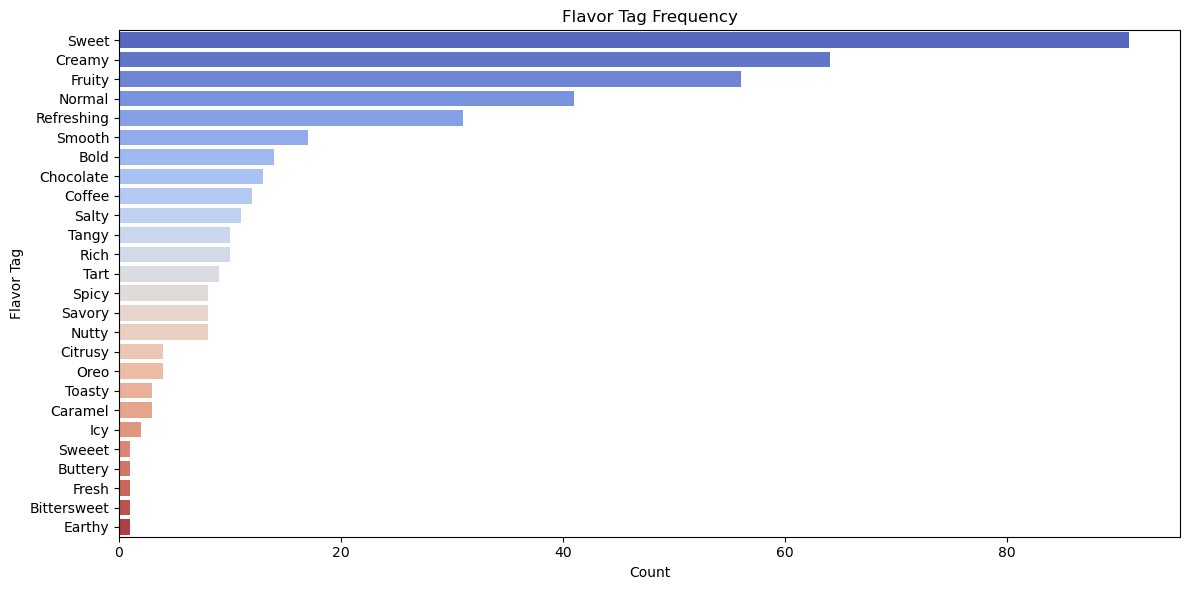

In [6]:
# Flavor Tag Frequency 
flavor_tags = dataset['flavor tags'].dropna().str.split(', ').sum()
flavor_tag_counts = Counter(flavor_tags)

flavor_df = pd.DataFrame.from_dict(flavor_tag_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=flavor_df['Count'], y=flavor_df.index, palette='coolwarm')
plt.title('Flavor Tag Frequency')
plt.xlabel('Count')
plt.ylabel('Flavor Tag')
plt.tight_layout()
plt.show()


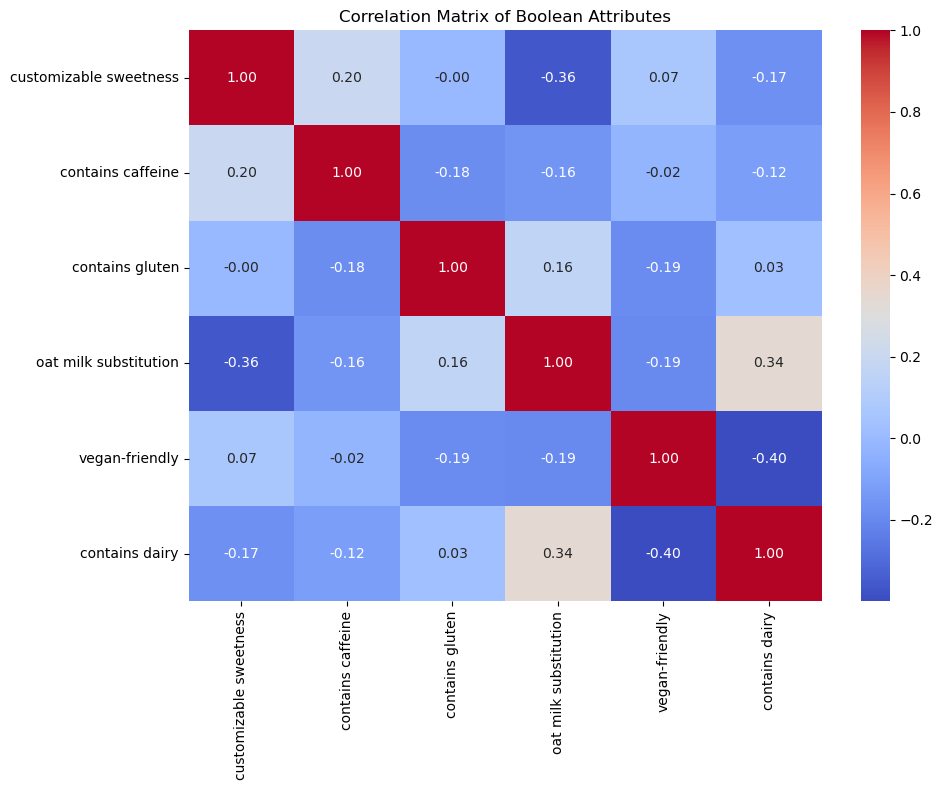

In [7]:
# 음료 속성 상관관계
# Encoding Boolean Columns
bool_columns = [
    'customizable sweetness', 
    'contains caffeine', 
    'contains gluten', 
    'oat milk substitution', 
    'vegan-friendly', 
    'contains dairy']
encoded_dataset = dataset.copy()
for col in bool_columns:
    encoded_dataset[col] = encoded_dataset[col].map({'Yes': 1, 'No': 0})

# Heatmap
plt.figure(figsize=(10, 8))
correlation = encoded_dataset[bool_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boolean Attributes')
plt.tight_layout()
plt.show()

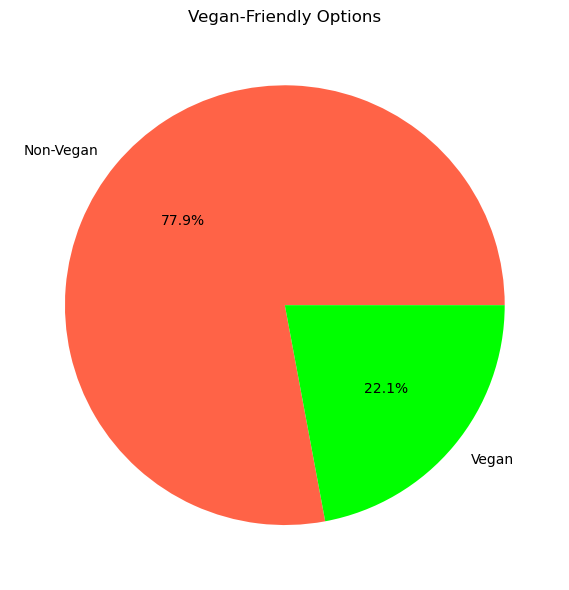

In [8]:
# Vegan-Friendly 음료 비율
vegan_counts = dataset['vegan-friendly'].value_counts()

plt.figure(figsize=(6, 6))
vegan_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Vegan', 'Vegan'], colors=['tomato', 'lime'])
plt.title('Vegan-Friendly Options')
plt.ylabel('')
plt.tight_layout()
plt.show()

/var/folders/d5/v0w7v20x70z55jvhywdpp06h0000gn/T/ipykernel_24258/3682862060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sweetness_counts.index, y=sweetness_counts.values, palette='muted')


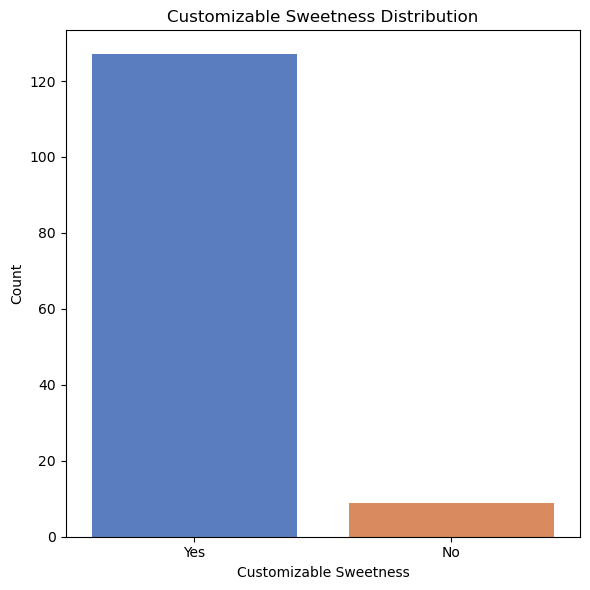

In [9]:
# Customizable Sweetness 음료
sweetness_counts = dataset['customizable sweetness'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=sweetness_counts.index, y=sweetness_counts.values, palette='muted')
plt.title('Customizable Sweetness Distribution')
plt.xlabel('Customizable Sweetness')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Number of VF & ND Drinks: 30


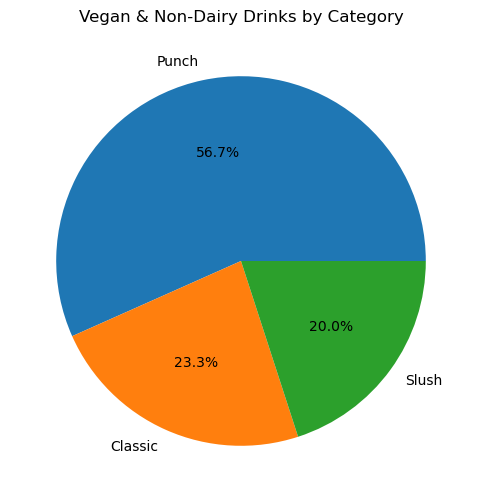

In [10]:
# Vegan-Friendly & Non-Dairy Drinks 음료 비율
filtered_dataset = dataset[(dataset['vegan-friendly'] == 'Yes') & (dataset['contains dairy'] == 'No')]
print(f"Number of VF & ND Drinks: {filtered_dataset.shape[0]}")
plt.figure(figsize=(6, 6))
filtered_dataset['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Vegan & Non-Dairy Drinks by Category')
plt.ylabel('')
plt.show()

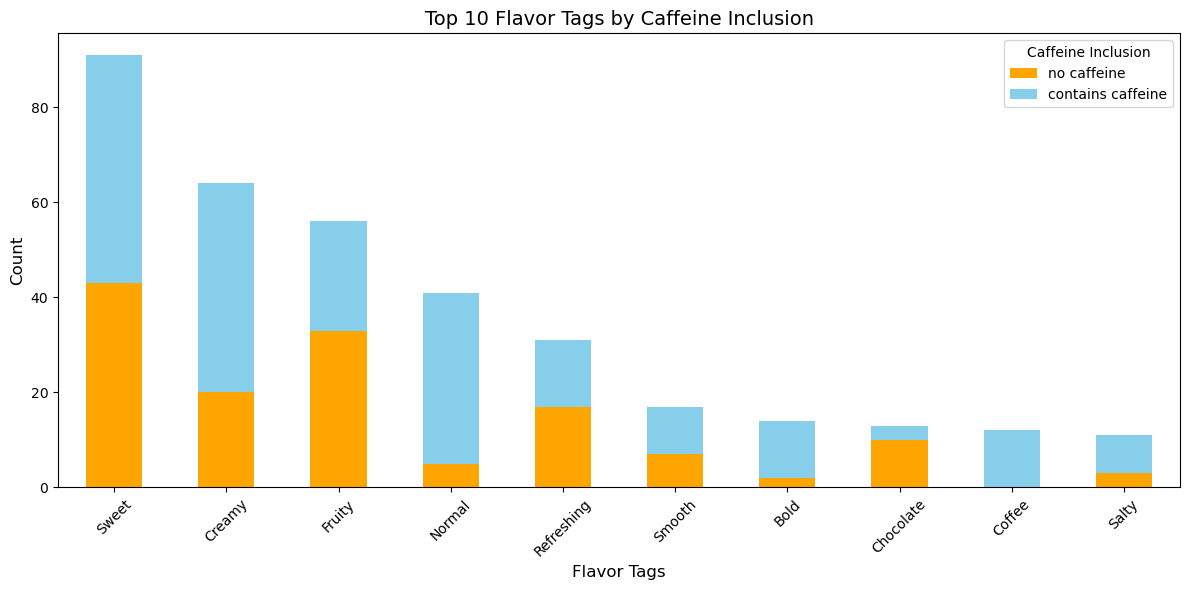

In [11]:
#  카페인 유무에 따른 Flavor Tags
# Flavor Tags by Caffeine Inclusion

# Flavor Tags를 카페인 유무로 그룹화 -> 결합
caffeine_flavor = dataset.groupby('contains caffeine')['flavor tags'].apply(lambda x: ', '.join(x.dropna().str.split(', ').sum()))
caffeine_flavor_counts = caffeine_flavor.str.split(', ').apply(Counter)

# row: Flavor Tags, col: Caffeine Inclusion
caffeine_flavor_df = pd.DataFrame.from_dict(caffeine_flavor_counts.to_dict(), orient='index').fillna(0)
caffeine_flavor_df = caffeine_flavor_df.T 
caffeine_flavor_df.columns = ['no caffeine', 'contains caffeine']  

# 상위 10개 Flavor Tags 
top_flavors = caffeine_flavor_df.sum(axis=1).sort_values(ascending=False).head(10)
caffeine_flavor_df_top = caffeine_flavor_df.loc[top_flavors.index]

caffeine_flavor_df_top.plot(kind='bar',figsize=(12, 6),stacked=True,color=['orange', 'skyblue'] )
plt.title('Top 10 Flavor Tags by Caffeine Inclusion', fontsize=14)
plt.xlabel('Flavor Tags', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Caffeine Inclusion', fontsize=10)
plt.tight_layout()
plt.show()

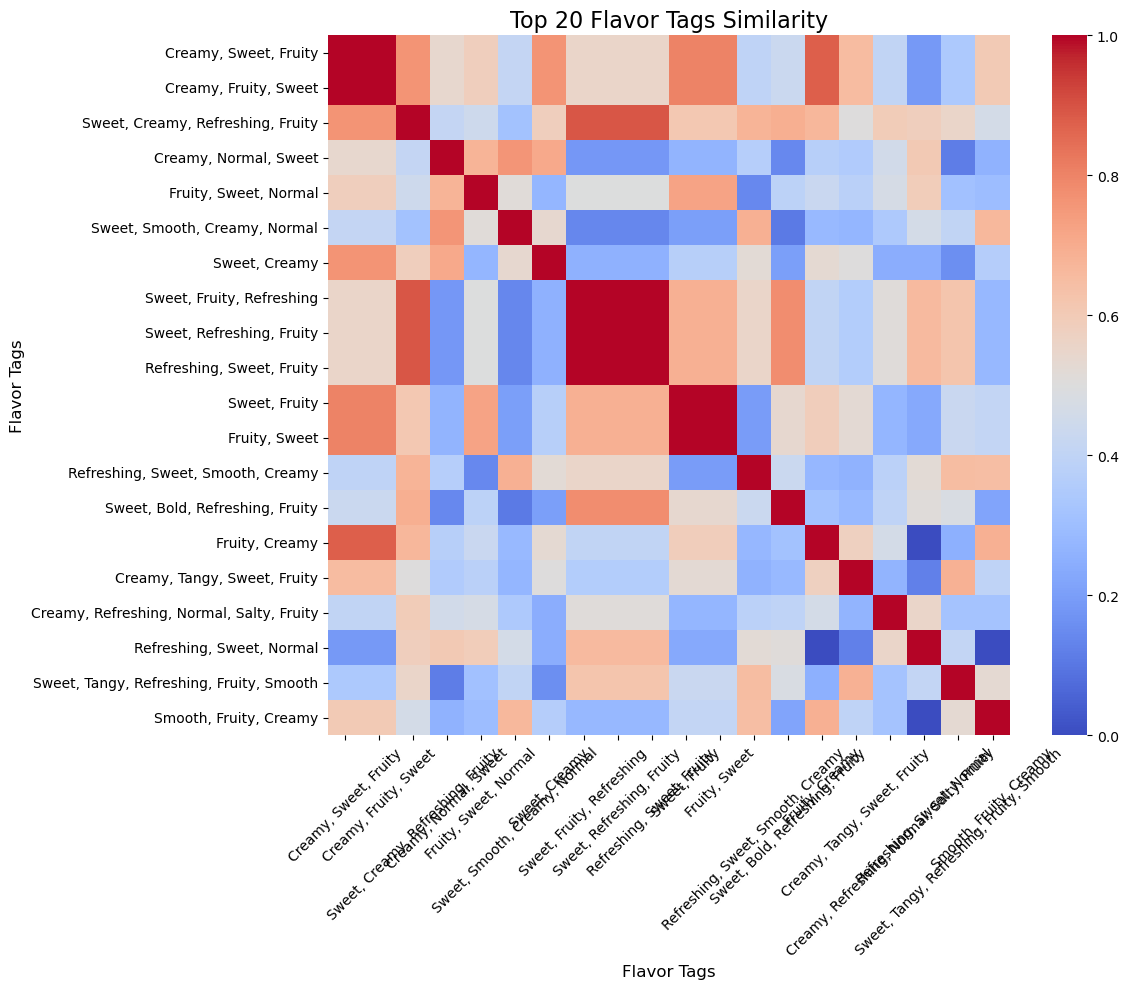

In [12]:
flavor_list = dataset['flavor tags'].dropna().unique()

# TF-IDF 벡터화 & 코사인 유사도 
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(flavor_list)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Flavor Tags top 20
top_n = 20
top_flavor_indices = pd.DataFrame(similarity_matrix, index=flavor_list, columns=flavor_list).sum(axis=1).sort_values(ascending=False).head(top_n).index
filtered_similarity_matrix = pd.DataFrame(similarity_matrix, index=flavor_list, columns=flavor_list).loc[top_flavor_indices, top_flavor_indices]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_similarity_matrix, annot=False, cmap='coolwarm', xticklabels=top_flavor_indices, yticklabels=top_flavor_indices)
plt.title('Top {} Flavor Tags Similarity'.format(top_n), fontsize=16)
plt.xlabel('Flavor Tags', fontsize=12)
plt.ylabel('Flavor Tags', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

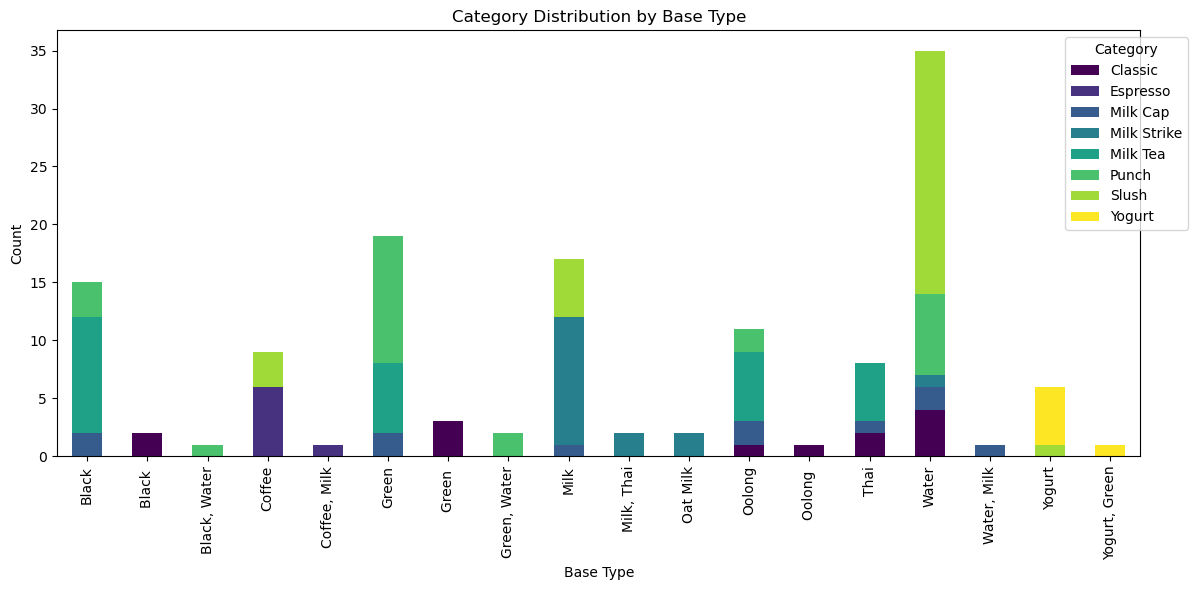

In [13]:
# Base Type에 따른 Category 분포
base_category_counts = dataset.groupby('base type')['category'].value_counts().unstack().fillna(0)

base_category_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title('Category Distribution by Base Type')
plt.xlabel('Base Type')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

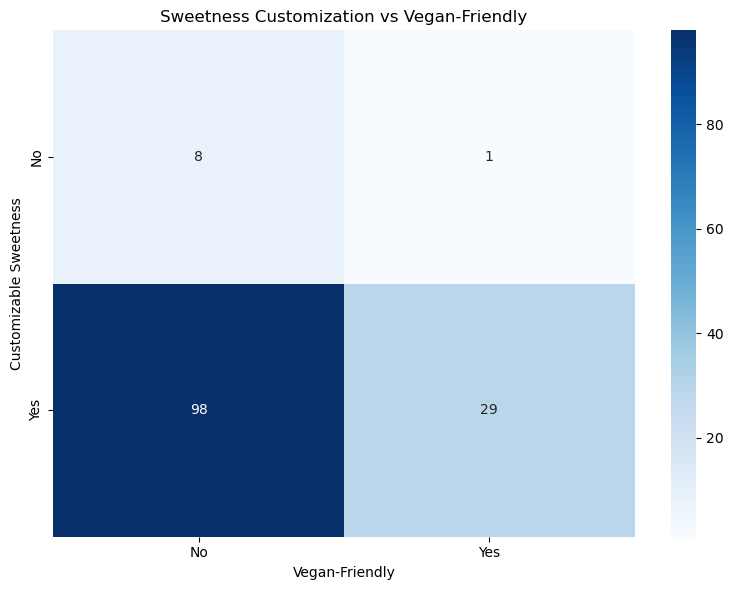

In [14]:
# Sweetness와 Vegan-Friendly 상관관계
sweetness_vegan = pd.crosstab(dataset['customizable sweetness'], dataset['vegan-friendly'])

plt.figure(figsize=(8, 6))
sns.heatmap(sweetness_vegan, annot=True, cmap='Blues', fmt='d')
plt.title('Sweetness Customization vs Vegan-Friendly')
plt.xlabel('Vegan-Friendly')
plt.ylabel('Customizable Sweetness')
plt.tight_layout()
plt.show()


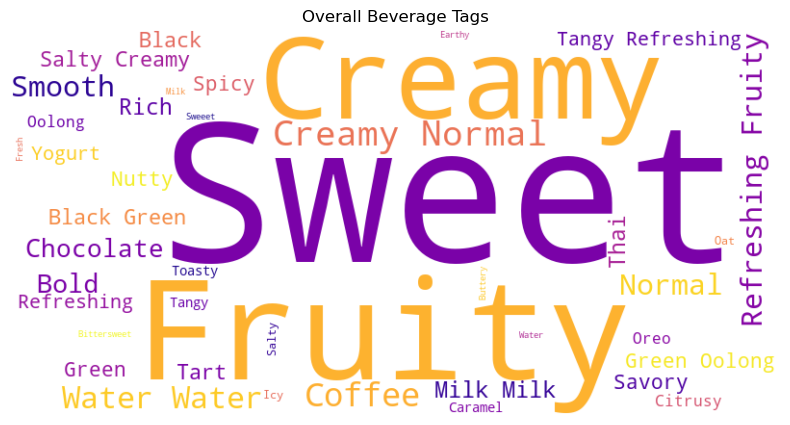

In [15]:
# Base Type + Flavor Tags 워크 클라우드
drink_summary = dataset.groupby('menu').agg({
    'base type': lambda x: ', '.join(x.unique()),
    'flavor tags': lambda x: ', '.join(x.dropna().unique())}).reset_index()

drink_summary 

all_tags = (dataset['base type'].dropna().str.cat(sep=', ') + ', ' +
            dataset['flavor tags'].dropna().str.cat(sep=', '))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_tags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Beverage Tags')
plt.show()